In [42]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
import os
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("D:/Nitte_NLP/nlp-basics/Day-2/Supervised_Classification/sentiment_classifier.csv", encoding='utf-8')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       200 non-null    object
 1   sentiment  200 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


Text Pre Processing

In [45]:
# Step 1: Lowercase
df['text_lower'] = df['text'].str.lower()
print("\nAfter Lowercasing:")
print(df['text_lower'].head())



After Lowercasing:
0        awful, completely useless.
1     highly recommend to everyone.
2            worst experience ever.
3    top-notch service and product.
4              not worth the money.
Name: text_lower, dtype: object


In [46]:
# Step 2: Remove punctuation
df['text_no_punct'] = df['text_lower'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
print("\nAfter Removing Punctuation:")
print(df['text_no_punct'].head())


After Removing Punctuation:
0        awful completely useless
1    highly recommend to everyone
2           worst experience ever
3    topnotch service and product
4             not worth the money
Name: text_no_punct, dtype: object


In [47]:
# Step 3: Remove digits
df['text_no_digits'] = df['text_no_punct'].apply(lambda x: re.sub(r'\d+', '', x))
print("\nAfter Removing Digits:")
print(df['text_no_digits'].head())


After Removing Digits:
0        awful completely useless
1    highly recommend to everyone
2           worst experience ever
3    topnotch service and product
4             not worth the money
Name: text_no_digits, dtype: object


In [48]:
# Step 4: Remove URLs (Optional)
df['text_no_urls'] = df['text_no_digits'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
print("\nAfter Removing URLs:")
print(df['text_no_urls'].head())


After Removing URLs:
0        awful completely useless
1    highly recommend to everyone
2           worst experience ever
3    topnotch service and product
4             not worth the money
Name: text_no_urls, dtype: object


In [49]:
# Step 5: Tokenization

nltk.download('punkt')
# Manually set download folder
nltk.download('punkt', download_dir=r'C:\Users\Admin\AppData\Roaming\nltk_data')
nltk.download('stopwords', download_dir=r'C:\Users\Admin\AppData\Roaming\nltk_data')
nltk.data.path.append(r'C:\Users\Admin\AppData\Roaming\nltk_data')
tokenizer = TreebankWordTokenizer()
df['tokens'] = df['text_no_urls'].apply(tokenizer.tokenize)

print("\nAfter Tokenization:")
print(df['tokens'].head())


After Tokenization:
0         [awful, completely, useless]
1    [highly, recommend, to, everyone]
2            [worst, experience, ever]
3    [topnotch, service, and, product]
4             [not, worth, the, money]
Name: tokens, dtype: object


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
# Step 6: Stopword Removal
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
print("\nAfter Stopword Removal:")
print(df['tokens_no_stopwords'].head())


After Stopword Removal:
0     [awful, completely, useless]
1    [highly, recommend, everyone]
2        [worst, experience, ever]
3     [topnotch, service, product]
4                   [worth, money]
Name: tokens_no_stopwords, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# Step 7: Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['tokens_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
print("\nAfter Lemmatization:")
print(df['lemmatized_tokens'].head())


After Lemmatization:
0     [awful, completely, useless]
1    [highly, recommend, everyone]
2        [worst, experience, ever]
3     [topnotch, service, product]
4                   [worth, money]
Name: lemmatized_tokens, dtype: object


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
# Step 8: Join Tokens into Clean Text
df['cleaned_text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))
print("\nFinal Cleaned Text:")
print(df[['cleaned_text']].head())


Final Cleaned Text:
                cleaned_text
0   awful completely useless
1  highly recommend everyone
2      worst experience ever
3   topnotch service product
4                worth money


In [65]:
df.to_csv('D:/Nitte_NLP/nlp-basics/Day-2/Supervised_Classification/cleaned_text_data.csv')

EDA

In [53]:
# Flatten all lemmatized tokens into one list
all_words = [word for tokens in df['lemmatized_tokens'] for word in tokens]

# Count frequencies
word_freq = Counter(all_words)

# Show a few
print("\nSample Word Frequencies:")
print(word_freq.most_common(10))


Sample Word Frequencies:
[('product', 21), ('quality', 21), ('service', 16), ('experience', 15), ('buy', 13), ('expectation', 13), ('nothing', 12), ('worst', 11), ('acceptable', 11), ('money', 10)]


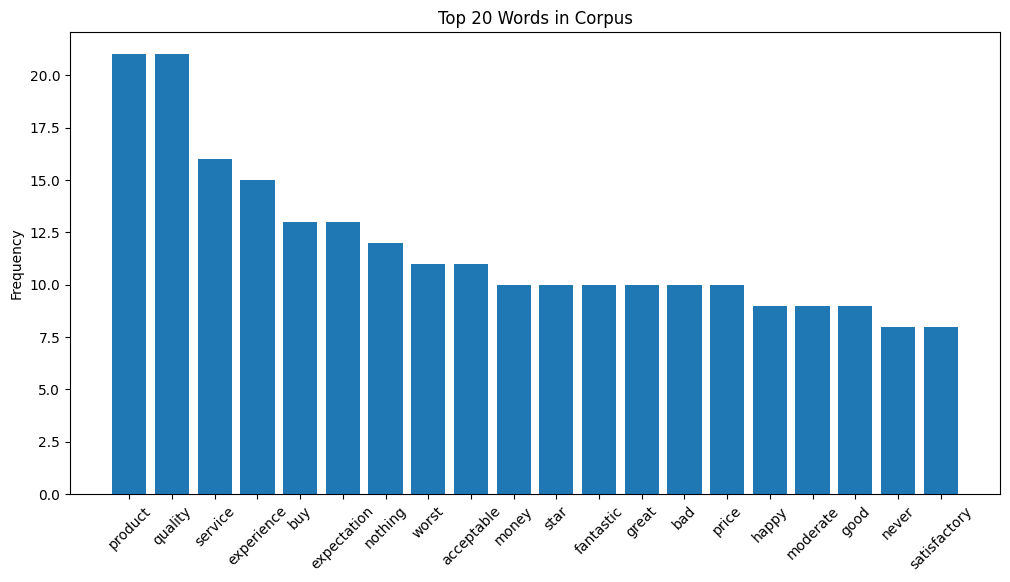

In [54]:
import matplotlib.pyplot as plt

# Get Top 20
top_20 = word_freq.most_common(20)

# Separate words and counts
words, counts = zip(*top_20)

# Plot
plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 20 Words in Corpus')
plt.ylabel('Frequency')
plt.show()


In [55]:
df['sentiment'].value_counts()

sentiment
negative    75
positive    65
neutral     60
Name: count, dtype: int64

In [56]:
# Initialize empty dictionary
class_word_freq = {}

# For each sentiment class
for sentiment in df['sentiment'].unique():
    # Filter rows for that class
    subset = df[df['sentiment'] == sentiment]
    # Flatten tokens
    words = [word for tokens in subset['lemmatized_tokens'] for word in tokens]
    # Count
    word_counter = Counter(words)
    class_word_freq[sentiment] = word_counter

# Print top 10 words for each class
for sentiment, counter in class_word_freq.items():
    print(f"\nTop words for {sentiment} sentiment:")
    print(counter.most_common(10))



Top words for negative sentiment:
[('worst', 11), ('quality', 11), ('money', 10), ('buy', 10), ('never', 8), ('poor', 8), ('awful', 7), ('completely', 7), ('useless', 7), ('experience', 7)]

Top words for positive sentiment:
[('product', 15), ('service', 12), ('fantastic', 10), ('great', 10), ('happy', 9), ('loved', 8), ('recommend', 6), ('amazing', 6), ('experience', 6), ('satisfied', 6)]

Top words for neutral sentiment:
[('nothing', 12), ('moderate', 9), ('satisfactory', 8), ('satisfaction', 8), ('expectation', 8), ('acceptable', 8), ('fine', 7), ('price', 7), ('meet', 7), ('quality', 7)]


Category wise token frequencies

In [57]:
# Initialize empty dictionary
class_word_freq = {}

# For each sentiment class
for sentiment in df['sentiment'].unique():
    # Filter rows for that class
    subset = df[df['sentiment'] == sentiment]
    # Flatten tokens
    words = [word for tokens in subset['lemmatized_tokens'] for word in tokens]
    # Count
    word_counter = Counter(words)
    class_word_freq[sentiment] = word_counter

# Print top 10 words for each class
for sentiment, counter in class_word_freq.items():
    print(f"\nTop words for {sentiment} sentiment:")
    print(counter.most_common(10))



Top words for negative sentiment:
[('worst', 11), ('quality', 11), ('money', 10), ('buy', 10), ('never', 8), ('poor', 8), ('awful', 7), ('completely', 7), ('useless', 7), ('experience', 7)]

Top words for positive sentiment:
[('product', 15), ('service', 12), ('fantastic', 10), ('great', 10), ('happy', 9), ('loved', 8), ('recommend', 6), ('amazing', 6), ('experience', 6), ('satisfied', 6)]

Top words for neutral sentiment:
[('nothing', 12), ('moderate', 9), ('satisfactory', 8), ('satisfaction', 8), ('expectation', 8), ('acceptable', 8), ('fine', 7), ('price', 7), ('meet', 7), ('quality', 7)]


Category Wise token plot

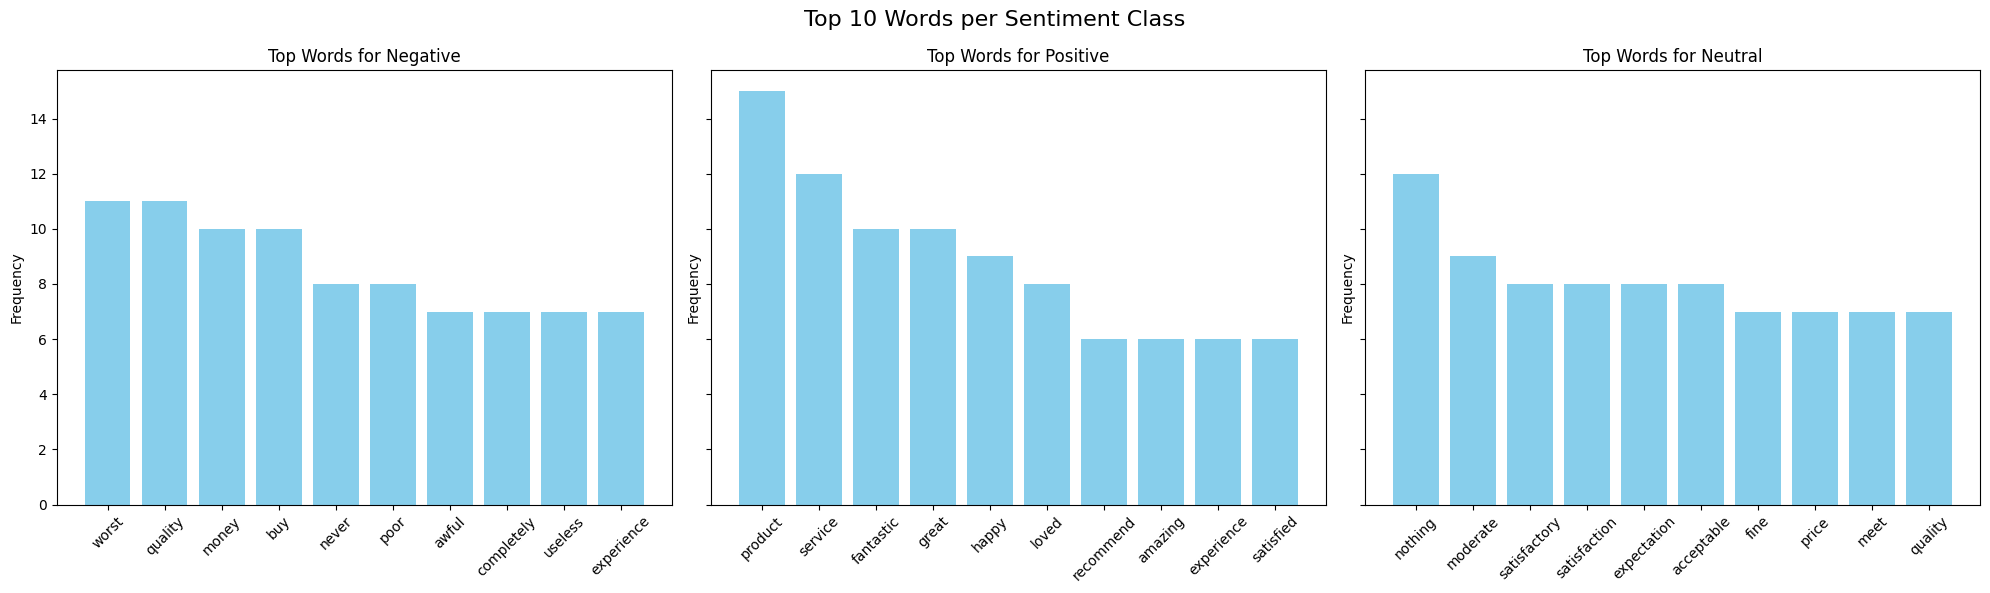

In [58]:
# Create a subplot for each sentiment class
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for idx, (sentiment, counter) in enumerate(class_word_freq.items()):
    # Get top 10 words and counts
    top_words = counter.most_common(10)
    words, counts = zip(*top_words)
    
    # Plot
    axes[idx].bar(words, counts, color='skyblue')
    axes[idx].set_title(f"Top Words for {sentiment.capitalize()}")
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].set_ylabel("Frequency")

plt.suptitle("Top 10 Words per Sentiment Class", fontsize=16)
plt.tight_layout()
plt.show()

Category wise word cloud

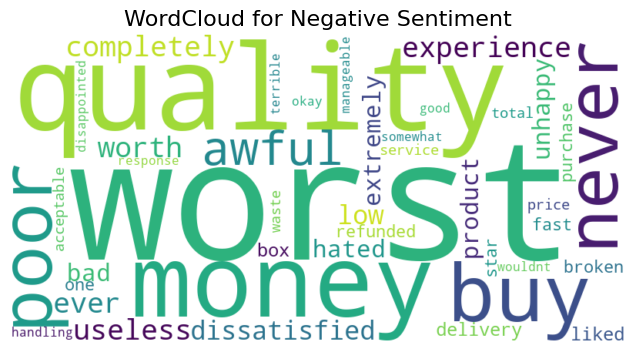

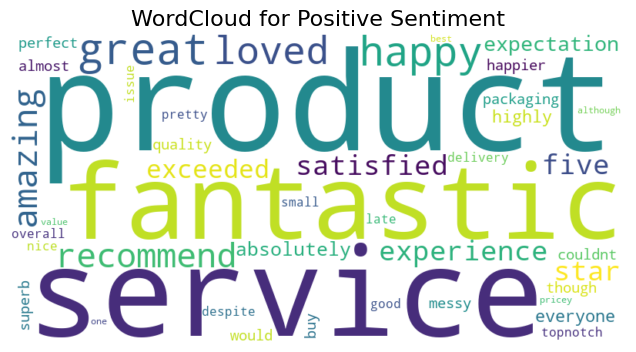

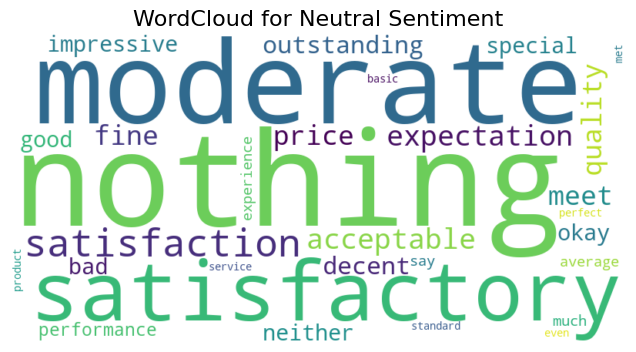

In [59]:
from wordcloud import WordCloud

# Create WordClouds
for sentiment, counter in class_word_freq.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counter)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment.capitalize()} Sentiment", fontsize=16)
    plt.show()


Machine Learning

In [60]:
 # Prepare Features and Labels
# X = features (text)
X = df['cleaned_text']   # You can use 'cleaned_text' column after preprocessing
# y = labels (sentiment)
y = df['sentiment']


In [61]:
# Text Vectorization (Bag of Words)
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform
X_bow = vectorizer.fit_transform(X)

print("\nShape of BoW Matrix:", X_bow.shape)



Shape of BoW Matrix: (200, 95)


In [62]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 160
Testing samples: 40


In [63]:
# Train Random Forest Classifier
# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train model
rf_model.fit(X_train, y_train)

print("\nRandom Forest Model Trained Successfully!")


Random Forest Model Trained Successfully!



Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.80      0.86        15
     neutral       0.79      0.92      0.85        12
    positive       0.92      0.92      0.92        13

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.88        40
weighted avg       0.88      0.88      0.88        40



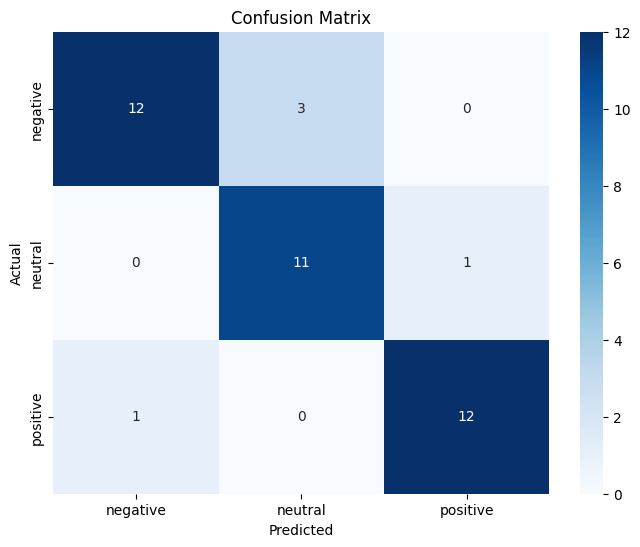

In [64]:
# Make Predictions and Evaluate
# Predict
y_pred = rf_model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
